In [236]:
import math
import numpy as np
import pandas as pd
from sympy import diff, symbols, lambdify, log, exp
import sympy
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.5f}".format

In [201]:
x_arg, y_arg = sympy.symbols('x y')
fs = x_arg**4 + sympy.log(1 + x_arg**2 + y_arg**2) - y_arg**2 + sympy.exp((0.1*y_arg))

f = sympy.lambdify(
    [x_arg, y_arg], 
    fs
)

def create_derivative(target_f, target_arg):
    d = sympy.diff(target_f, target_arg)
    l = sympy.lambdify([x_arg, y_arg], d)
    return l, d

dx, dxs = create_derivative(fs, x_arg)
dy, dys = create_derivative(fs, y_arg)
dxx, dxxs = create_derivative(dxs, x_arg)
dxy, dxys = create_derivative(dxs, y_arg)
dyy, dyys = create_derivative(dys, y_arg)

In [202]:
def gradf(x):
    return np.array([dx(*x), dy(*x)]) 
                     
def fi1(x):
    return - dx(*x)**2 - dy(*x)**2
                     
def fi2(x):
    return (dxx(*x)*dx(*x)**2) + (2*dxy(*x)*dx(*x)*dy(*x)) + (dyy(*x)*dy(*x)**2)

def find_t(x):
    return - fi1(x)/fi2(x)

In [248]:
def find_minimum(x, target):
    target = np.array(target)
    df = pd.DataFrame({'norm(shift)':[], 'x':[], 'y':[], 'distance':[]})
    x_cur = x
    i = 0
    while True:
        i += 1
        t = find_t(x_cur)
        g = gradf(x_cur)
        df = df.append(pd.DataFrame({
            'norm(shift)':[np.linalg.norm(t*g)], 
            'x':[x_cur[0]], 'y':[x_cur[1]], 
            'distance': [np.linalg.norm(x_cur - target)],
        }))
        x_cur = x_cur - t*g
        if abs(np.max(gradf(x_cur))) < eps:
            break
        
    df = df.reset_index()
    df = df.drop('index', axis=1)
    return x_cur, df

RESULT: [1.20717706e-04 3.91738706e-01] [0, 0.391403]


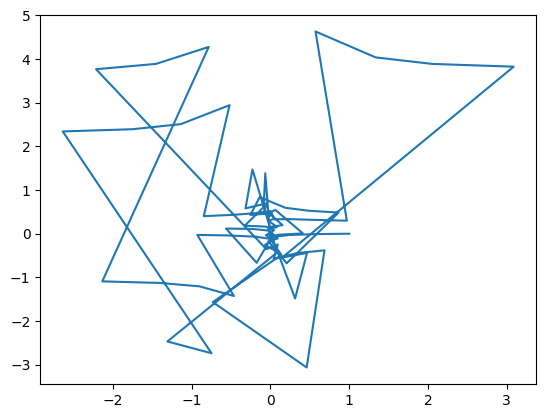

In [265]:
eps = 0.001
target = [0, 0.391403]
x_start = np.array([1, 0])
x_min, df = find_minimum(x_start, target)
print('RESULT:', x_min, target)
plt.plot(df.x, df.y)
plt.show()
df['norm(shift)'] = df['norm(shift)'].apply(lambda x: "{:2.5f}".format(x))
df.x = df.x.apply(lambda x: "{:2.5f}".format(x))
df.y = df.y.apply(lambda x: "{:2.5f}".format(x))
df.distance = df.distance.apply(lambda x: "{:2.5f}".format(x))

In [260]:
for i in range(len(df)):
    if i%3 != 1:
        df = df.drop(i, axis=0)
df.to_csv('table6.csv')
print( df.to_string())

   norm(shift)         x         y distance
1      0.34751   0.58315  -0.00834  0.70701
4      0.87529  -0.17489  -0.66612  1.07189
7      1.58385  -0.01048   0.06850  0.32308
10     5.26395   0.14976  -0.54428  0.94760
13     0.96594   1.33437   4.03660  3.88175
16     0.32826   0.56438   0.31609  0.56938
19     0.17442  -0.02411   0.29276  0.10155
22     0.13532   0.09176  -0.10988  0.50961
25     0.37864   0.86523   0.48455  0.87023
28     0.42393  -0.13720   0.83758  0.46680
31     0.64235   0.06178   0.54594  0.16643
34     0.43148  -0.02013  -0.08233  0.47416
37     2.69122   0.45944  -3.06214  3.48397
40     0.33658   0.04050  -0.57978  0.97203
43     0.77019  -2.21350   3.76542  4.03529
46     0.72688  -2.13450  -1.09096  2.59875
49     1.47277  -0.46361  -1.42552  1.87514
52     0.19371  -0.18931  -0.06791  0.49680
55     0.48761  -0.08646   0.60808  0.23329
58     0.15363   0.04547   0.07826  0.31643
61     0.22729  -0.06859  -0.25867  0.65368
64     5.41741  -0.74784  -2.736

In [267]:
print(np.linalg.norm(target-x_min))
print(np.linalg.norm(target))
print(np.linalg.norm(target-x_min)/np.linalg.norm(target))
print(np.linalg.norm(target-x_min))

0.00035675094343429415
0.391403
0.0009114670644688318
0.00035675094343429415
